## feature ranking with elimination

In [1]:
import csv
import time  # Just to compare fit times
from pathlib import Path
from pprint import pprint
import csv
import multiprocessing

In [2]:
import numpy as np
# import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb
# from tune_sklearn import TuneSearchCV
# from xgboost import XGBRegressor
# import xgboost as xgb

In [3]:
import pandas as pd
import numpy as np
# import distributed

# import dask
# import dask.array as da
# import dask.dataframe as dd
# from dask.distributed import Client, wait, LocalCluster

# from dask_cuda import LocalCUDACluster
from sklearn.model_selection import train_test_split

# from dask_ml.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
# from dask_ml.metrics import r2_score
import xgboost as xgb

In [4]:
input_files = [
    Path("../data/original_df.csv"),
    Path("../data/scaled_df.csv"),
    Path("../data/quantile_df.csv")
]     
# df = pd.read_csv(input_file)
# y = df['target'] 
# X = df.drop("target",axis=1)
# scores = cross_val_score(XGBRegressor(objective='reg:squarederror'), X, y, scoring='r2')

# input_dataset_path = Path('../data/input_dataset.csv')

## Build-in Recursive feature elimination with cross-validation


In [8]:
%%time
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


input_file = Path("../data/formated_dataset.csv")



df = pd.read_csv(input_file).astype('float32')
df = df[~df.isin([np.nan, np.inf, -np.inf,-9999.0]).any(1)]
y = df['target'].values
X = df.drop("target",axis=1).values

estimator = XGBRegressor(objective='reg:squarederror',tree_method='gpu_hist', n_jobs=-1)
rfe = RFE(estimator=estimator, n_features_to_select=10)
pipeline = Pipeline(steps=[('s',rfe),('e',estimator)])

kf = KFold(n_splits=3,shuffle=True, random_state=3)
cv_scores = cross_val_score(pipeline, X, y, cv=kf,scoring='r2', n_jobs=-1)
mean_score = np.mean(cv_scores)
print("cv_scores",cv_scores)
print("mean_score",mean_score)




# modelX = LogisticRegression()
# rfecv = RFECV(estimator=modelX, step=1, scoring='mean_absolute_error')
# rfecv.fit(df_normdf, y_train)
# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()`

cv_scores [nan nan nan]
mean_score nan
CPU times: user 2.07 s, sys: 226 ms, total: 2.3 s
Wall time: 4.34 s


In [18]:
type(y)
array_has_nan = np.isnan(X[0])

print(any(array_has_nan))

False


In [6]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV


# Create the RFE object and compute a cross-validated score.
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=multiprocessing.cpu_count() // 2)

# The "accuracy" scoring is proportional to the number of correct
# classifications
for input_file in input_files:
    print("input_file: ",input_file)
    df = pd.read_csv(input_file)
    y = df['target'] 
    X = df.drop("target",axis=1)
    min_features_to_select = 1  # Minimum number of features to consider
    rfecv = RFECV(estimator=xgb_model, 
              step=1, 
              cv=2,
              scoring='r2',
              min_features_to_select=min_features_to_select)
    rfecv.fit(X, y)

    print("Optimal number of features : %d" % rfecv.n_features_)
    print("Support: ",rfecv.support_)
    print("Ranking: ",rfecv.ranking_)
    
    


input_file:  ../data/original_df.csv
Optimal number of features : 25
Support:  [False False False  True False  True False False False  True  True  True
 False False False False False False  True  True  True  True  True  True
  True  True  True  True False  True False False False  True  True False
  True  True  True  True  True False  True  True]
Ranking:  [20 17  7  1 14  1 10 18 12  1  1  1  4 19 16  3  8 13  1  1  1  1  1  1
  1  1  1  1 11  1  6 15  2  1  1  9  1  1  1  1  1  5  1  1]
input_file:  ../data/scaled_df.csv
Optimal number of features : 34
Support:  [ True  True False  True False  True False  True False  True  True  True
  True  True  True  True  True False  True  True False  True  True  True
  True  True  True  True  True  True False False  True False  True  True
  True  True  True  True  True False  True  True]
Ranking:  [ 1  1  7  1 11  1  3  1 10  1  1  1  1  1  1  1  1  5  1  1  4  1  1  1
  1  1  1  1  1  1  2  8  1  9  1  1  1  1  1  1  1  6  1  1]
input_file:  ../

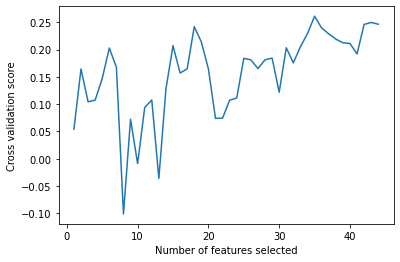

In [13]:

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select), rfecv.grid_scores_)
plt.show()

In [14]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [15]:
rfecv.ranking_

array([ 1,  1,  1,  1,  1,  1,  5,  8,  1,  1,  1,  4,  3,  1,  9,  1,  1,
        1,  1,  1,  7,  1,  1,  1,  1,  1,  1,  6,  1,  1, 10,  1,  1,  1,
        2,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [16]:
headers = next(csv.reader(open(input_dataset_path)))[1:]

unsorteddic = {}
for i, rank in enumerate(rfecv.ranking_):
        unsorteddic[headers[i]] = rank
sorteddic = dict(sorted(unsorteddic.items(), key=lambda item: item[1]))
sorteddic

{'/g/data/ge3/sheece/LOC_distance_to_coast.tif': 1,
 '/g/data/ge3/sheece/mrvbf_9.tif': 1,
 '/g/data/ge3/sheece/relief_mrvbf_3s_mosaic.tif': 1,
 '/g/data/ge3/sheece/relief_elev_focalrange1000m_3s.tif': 1,
 '/g/data/ge3/sheece/relief_elev_focalrange300m_3s.tif': 1,
 '/g/data/ge3/sheece/saga_wetSM_85_resampled.tif': 1,
 '/g/data/ge3/sheece/dem_fill.tif': 1,
 '/g/data/ge3/sheece/3dem_mag2.tif': 1,
 '/g/data/ge3/sheece/3dem_mag1_fin.tif': 1,
 '/g/data/ge3/sheece/Dose_2016.tif': 1,
 '/g/data/ge3/sheece/Potassium_2016.tif': 1,
 '/g/data/ge3/sheece/Thorium_2016.tif': 1,
 '/g/data/ge3/sheece/Rad2016U_Th.tif': 1,
 '/g/data/ge3/sheece/Rad2016K_Th.tif': 1,
 '/g/data/ge3/sheece/si_geol1.tif': 1,
 '/g/data/ge3/sheece/ceno_euc_aust1.tif': 1,
 '/g/data/ge3/sheece/Grav_lane_clip.tif': 1,
 '/g/data/ge3/sheece/be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata.tif': 1,
 '/g/data/ge3/sheece/be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata.tif': 1,
 '/g/data/ge3/sheece/be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.noda

## In-house Recursive feature elimination

In [7]:
# # from sklearn.metrics import  explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

# # Start cluster and client. This is currently local, although I would like to make this distributed across many nodes.
# # cluster = LocalCUDACluster(CUDA_VISIBLE_DEVICES='0,1,2,3', threads_per_worker=2)
# cluster = LocalCluster(n_workers=24,threads_per_worker=12,dashboard_address='0.0.0.0:8787')
# # cluster = LocalCluster(dashboard_address='0.0.0.0:8787') # Workers: 6, Cores: 24
# # cluster = LocalCUDACluster(CUDA_VISIBLE_DEVICES='0,1,2,3', threads_per_worker=24,dashboard_address='0.0.0.0:8787')

# # cluster = LocalCUDACluster()
# client = Client(cluster)
# client

In [4]:
import statistics 
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import statistics 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
from pathlib import Path
import pickle
from sklearn.model_selection import KFold


def get_score_without_feature(X, y, features_to_drop):    
    
    model = XGBRegressor(objective='reg:squarederror',tree_method='gpu_hist', gpu_id=0, n_jobs=-1)
    kf = KFold(n_splits=3,shuffle=True, random_state=3)
    cv_scores = cross_val_score(model, X.drop(features_to_drop,axis=1).values, y.values, cv=kf,scoring='r2', n_jobs=-1)
    mean_score = np.mean(cv_scores)
    return mean_score

In [5]:
def find_least_important_feature(X, y):
        
    intermediate_results = {}
    for featureindex,feature_name in enumerate(X.columns):
        score_without_feature = get_score_without_feature(X, y, feature_name)
        intermediate_results[feature_name] = score_without_feature
        print("Getting score for: ",feature_name,score_without_feature,type(score_without_feature),len(X.columns)-1)
           
    # calculate the results        
    lowest_feature = None
    lowest_score = 9999
    for feature_name in intermediate_results.keys():
        score_without_feature = intermediate_results[feature_name]
        if score_without_feature <= lowest_score:
            lowest_score = score_without_feature
            lowest_feature = feature_name
        del score_without_feature
    
    
    results = {}
    results["lowest_score"] = lowest_score
    results["lowest_feature"] = lowest_feature
    results["intermediate_results"] = intermediate_results
    return results

In [ ]:
%%time

input_file = Path("../data/quantile_df.csv")

df = pd.read_csv(input_file).astype('float32')
df = df[~df.isin([np.nan, np.inf, -np.inf,-9999.0]).any(1)]
y = df['target']
X = df.drop("target",axis=1)

min_features_required = 2
complete_result = {}
results = {}

current_total_feature = X.shape[1]
complete_result[current_total_feature] = {}

count = 1
print("Staring experiment for: ",X.shape[1]," features")
results[current_total_feature] = find_least_important_feature(X,y)
print("Results of ",str(count)," iteration:",results[current_total_feature]["lowest_score"],results[current_total_feature]["lowest_feature"])

current_X = X.drop(results[current_total_feature]["lowest_feature"],axis=1)   
current_total_feature = current_X.shape[1]

count = 2
while(current_total_feature>min_features_required):
    print("Staring experiment for: ",current_total_feature)
    results[current_total_feature] = find_least_important_feature(current_X,y)
    print("Results of ",str(count)," iteration:",results[current_total_feature]["lowest_score"],type(results[current_total_feature]["lowest_score"]),results[current_total_feature]["lowest_feature"])
    current_X = current_X.drop(results[current_total_feature]["lowest_feature"],axis=1)
    current_total_feature = current_X.shape[1]

    count = count + 1

output_file_name = str(input_file.stem)+".pkl"
print(output_file_name)
file = open(output_file_name, 'wb')
pickle.dump(results, file)
file.close()

Staring experiment for:  46  features
Getting score for:  slope_fill2 0.7633313714343775 <class 'numpy.float64'> 45
Getting score for:  Thorium_2016 0.7615910874286049 <class 'numpy.float64'> 45
Getting score for:  Clim_Prescott_LindaGregory 0.7612993596559404 <class 'numpy.float64'> 45
Getting score for:  be-30y-85m-avg-GREEN.filled.lzw.nodata 0.762975774695172 <class 'numpy.float64'> 45
Getting score for:  mrvbf_9 0.7624826771235979 <class 'numpy.float64'> 45
Getting score for:  be-30y-85m-avg-SWIR1.filled.lzw.nodata 0.7625885489480271 <class 'numpy.float64'> 45
Getting score for:  clim_WDA_albers 0.7629361378489357 <class 'numpy.float64'> 45
Getting score for:  be-30y-85m-avg-RED.filled.lzw.nodata 0.7641194891773715 <class 'numpy.float64'> 45
Getting score for:  si_geol1 0.7604456998273834 <class 'numpy.float64'> 45
Getting score for:  relief_mrvbf_3s_mosaic 0.7622418470158285 <class 'numpy.float64'> 45
Getting score for:  be-l8-all-85m-avg-NIR.filled.lzw.nodata 0.7634661024231094 <

In [12]:
plot_1_data = []
for exp_no in results.keys():
        plot_1_data.append((exp_no,results[exp_no]["lowest_score"]))

plt.scatter(*zip(*plot_1_data))
plt.gca().invert_xaxis()
plt.ylim(0,0.5)
plt.xlabel("Number of features in this experiment")
plt.ylabel("Score for the weakest the feature")
plt.show()

NameError: name 'plt' is not defined

In [ ]:
#save results
import pickle

fileObj = open('complete_result_irfec.pkl', 'wb')
pickle.dump(complete_result,fileObj)
fileObj.close()

In [ ]:
## In-house Recursive feature elimination sci-kit style


## Shutdown Cluster

In [220]:
client = distributed.client._get_global_client()
client

Client Scheduler: tcp://127.0.0.1:34217 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 96 Memory: 538.97 GB


In [221]:
client.shutdown()


distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
ERROR:asyncio:_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
